In [1]:
# Dependencies
import tweepy 
import numpy as np
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Set up target users
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

In [6]:
# List to hold results
sentiments = []

# Loop through all target users
for target_user in target_users:
    
    # Counter
    counter = 1
        
    # getting 100 tweets (5 pages)
    for x in range(1, 6):
        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target_user, page=x)
        
        for tweet in public_tweets:
            target_text = tweet["text"]
            results = analyzer.polarity_scores(target_text)
            
            # Add the results in sentiments
            sentiments.append({"Media Sources": target_user,
                               "Tweet Polarity": results["compound"],
                               "Tweets Ago": counter})
            counter += 1

In [7]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.to_csv("../Output/Media_Tweets_DataFrame.csv")
sentiments_pd.head()

,Media Sources,Tweet Polarity,Tweets Ago
0,@BBC,-0.7579,1
1,@BBC,-0.4767,2
2,@BBC,-0.7096,3
3,@BBC,0.0000,4
4,@BBC,0.0000,5


In [8]:
# Making DataFrame by media
bbc_df = sentiments_pd[sentiments_pd["Media Sources"] == "@BBC"]
cbs_df = sentiments_pd[sentiments_pd["Media Sources"] == "@CBS"]
cnn_df = sentiments_pd[sentiments_pd["Media Sources"] == "@CNN"]
fox_df = sentiments_pd[sentiments_pd["Media Sources"] == "@FoxNews"]
nytimes_df = sentiments_pd[sentiments_pd["Media Sources"] == "@nytimes"]

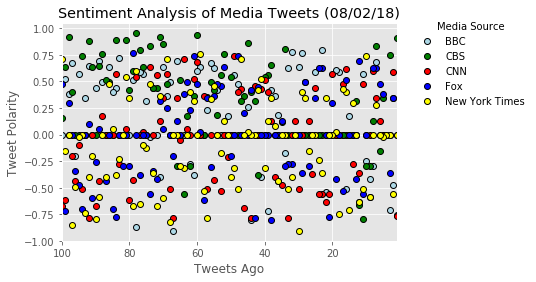

In [9]:
# Create plots
x_bbc = bbc_df["Tweets Ago"]
y_bbc = bbc_df["Tweet Polarity"]
x_cbs = cbs_df["Tweets Ago"]
y_cbs = cbs_df["Tweet Polarity"]
x_cnn = cnn_df["Tweets Ago"]
y_cnn = cnn_df["Tweet Polarity"]
x_fox = fox_df["Tweets Ago"]
y_fox = fox_df["Tweet Polarity"]
x_nytimes = nytimes_df["Tweets Ago"]
y_nytimes = nytimes_df["Tweet Polarity"]

plt.plot(x_bbc, y_bbc, marker="o", markeredgecolor="black", color="lightblue", linewidth=0, alpha=1, label="BBC")
plt.plot(x_cbs, y_cbs, marker="o", markeredgecolor="black", color="green", linewidth=0, alpha=1, label="CBS")
plt.plot(x_cnn, y_cnn, marker="o", markeredgecolor="black", color="red", linewidth=0, alpha=1, label="CNN")
plt.plot(x_fox, y_fox, marker="o", markeredgecolor="black", color="blue", linewidth=0, alpha=1, label="Fox")
plt.plot(x_nytimes, y_nytimes, marker="o", markeredgecolor="black", color="yellow", linewidth=0, alpha=1, label="New York Times")


# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim([x_bbc.max(),x_bbc.min()]) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.legend(title="Media Source", loc=(1.05, 0.6), framealpha=0)

plt.savefig("../Output/Media_Tweets.png", bbox_inches="tight")

plt.show()

In [10]:
# Calculate overall sentiments
bbc_overall = bbc_df["Tweet Polarity"].mean()
cbs_overall = cbs_df["Tweet Polarity"].mean()
cnn_overall = cnn_df["Tweet Polarity"].mean()
fox_overall = fox_df["Tweet Polarity"].mean()
nytimes_overall = nytimes_df["Tweet Polarity"].mean()

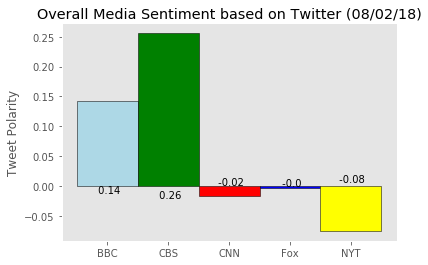

In [11]:
# Create plot
x = ("BBC", "CBS", "CNN", "Fox", "NYT")
x_axis = np.arange(len(x))
y_axis = (bbc_overall, cbs_overall, cnn_overall, fox_overall, nytimes_overall)

bar_plot = plt.bar(x_axis, y_axis, align="center", width=1, edgecolor="black")

tick_location = [value for value in x_axis]
plt.xticks(tick_location, x)

bar_plot[0].set_color('lightblue')
bar_plot[1].set_color('green')
bar_plot[2].set_color('red')
bar_plot[3].set_color('blue')
bar_plot[4].set_color('yellow')

bar_plot[0].set_edgecolor('black')
bar_plot[1].set_edgecolor('black')
bar_plot[2].set_edgecolor('black')
bar_plot[3].set_edgecolor('black')
bar_plot[4].set_edgecolor('black')

for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, -0.08*height, " "+str(height.round(2)), color='black', ha='center')


plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.ylabel("Tweet Polarity")

plt.grid(None)

plt.savefig("../Output/Media_Tweets_overall.png", bbox_inches="tight")

plt.show()